# Capítulo 1 - Relações Espaciais

## Introdução

<p style="text-align: justify">
    As relações espaciais são fundamentais na análise de dados geográficos e no entendimento das dinâmicas espaciais que ocorrem no mundo ao redor. Elas descrevem como diferentes objetos ou fenômenos se relacionam entre si no espaço, influenciando diretamente a percepção, interação e planejamento no ambiente físico.
</p>

<p style="text-align: justify">
    Na geografia, essas relações são observadas em diversos contextos, desde a proximidade entre cidades e a distribuição de recursos naturais até a interação entre indivíduos em uma rede social. A análise das relações espaciais permite identificar padrões, como a concentração de crimes em determinadas áreas urbanas ou a dispersão de espécies em um ecossistema, e compreender os processos subjacentes que moldam esses padrões.
</p>

<p style="text-align: justify">
    Nesse contexto, destaca-se a Lei de Tobler, a qual afirma que <strong>objetos próximos estão mais relacionados do que aqueles distantes</strong>. Embora isso pareça trivial, muitas abordagens tradicionais de estatísticas e aprendizado de máquina desconsideram essa realidade ao assumirem que os dados são independentes. No entanto, a dependência espacial à qual a Lei de Tobler se refere é uma característica única e valiosa dos dados, reforçando a relevância das relações espaciais em análises precisas e significativas. (Bennet e Vale, 2023).
</p>


## Definindo Relações Espaciais

<p style="text-align: justify">
  Em primeira análise, para definir o que significa ser próximo no espaço (e às vezes no tempo), é importante levar em consideração que os elementos em um conjunto de dados geográficos podem estar relacionados de várias maneiras e que cada um terá sua própria vizinhança bem definida. Assim, para explorar esse conceito, o elemento cuja vizinhança se deseja definir será denominado <strong>característica focal</strong>, como mostrado na Figura 01.
</p>

<br/>

<figure style="text-align: center">
  <h4><strong>Figura 01</strong> - Vizinhança e característica focal.</h4> <br/>
  <img src="./../images/neighborhood.jpg" alt="Vizinhança e característica focal." width="80%"> <br/>
  <figcaption style="text-align: center">Fonte: Adaptado de Bennet e Vale (2023).</figcaption>
</figure>

<br/>

<p style="text-align: justify">
  Além disso, tem-se que as <strong>relações espaciais são representadas por pesos</strong>, os quais podem ser classificados em: 

  <ul style="text-align: justify">
    <li>
      <strong>binários:</strong> que indicam se uma característica está presente ou não na vizinhança da característica focal;
    </li>
    <li>
      <strong>contínuos:</strong> cujas magnitudes determinam a importância da relação ou quão influente é a característica vizinha para a característica focal.
  </ul>

</p>

<p style="text-align: justify">
  Quanto às diferentes maneiras de definir vizinhança, cada uma adequada a diferentes tipos de dados e perguntas de pesquisa, as mais comuns serão exploradas a seguir.
</p>







### Número de Vizinhos

<p style="text-align: justify">
    Esta abordagem define a vizinhança com base em um <strong>número fixo de vizinhos</strong> mais próximos da característica focal. Nesse panorama, é possível que as distâncias variem de acordo com a densidade de características na área de estudo. <strong>Quanto mais densa a área, menor a vizinhança e mais próximos os vizinhos estarão da característica focal</strong>. Dessa maneira, o tamanho das vizinhanças pode variar bastante,  ainda que o quantidade de vizinhos especificada pelo usuário seja constante para cada uma delas, como mostrado na Figura 02.
</p>


<figure style="text-align: center">
  <h4><strong>Figura 02</strong> - Número de vizinhos igual a 4 para áreas com diferentes densidades.</h4> <br/>
  <img src="./../images/neighbors-number.jpg" alt="Número de vizinhos igual a 4 para áreas com diferentes densidades." width="80%"> <br/>
  <figcaption style="text-align: center">Fonte: Bennet e Vale (2023).</figcaption>
</figure>


<p style="text-align: justify">
    Este método, amplamente utilizado devido a sua simplicidade, é também conhecido como k-vizinhos mais próximos, em que a constante k representa o número especificado de vizinhos. Além disso, a capacidade de adaptação a diferentes densidades de características confere à referida abordagem a denominação <strong>vizinhança adaptativa</strong>.
</p>





<p style="text-align: justify">
    Agora que teoria por trás do método do número de vizinhos foi minimamente discutida, é interessante explorar a aplicação dessa técnica na prática utilizando <strong>Python</strong>. Com tal objetivo, é conveniente a utilização de bibliotecas como <strong>NumPy</strong> para operações numéricas, <strong>GeoPandas</strong> para manipulação de dados geográficos e <strong>Matplotlib</strong> para visualização.
</p>


* Primeiramente, geramos coordenadas para definir 30 pontos aletórios:

In [47]:
import numpy as np
import random

np.random.seed(42)
num_points = 30
x_coords = np.random.rand(num_points) * 10
y_coords = np.random.rand(num_points) * 10


* Em seguida, geramos os 30 pontos aleatórios propriamente ditos:

In [48]:
from shapely.geometry import Point

points = [Point(x, y) for x, y in zip(x_coords, y_coords)]

* Com os pontos gerados, criamos um GeoDataFrame e definimos um sistema de coordenadas:

In [38]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(geometry=points)
gdf.crs = "EPSG:4326"

* Agora, podemos plotar os pontos gerados:

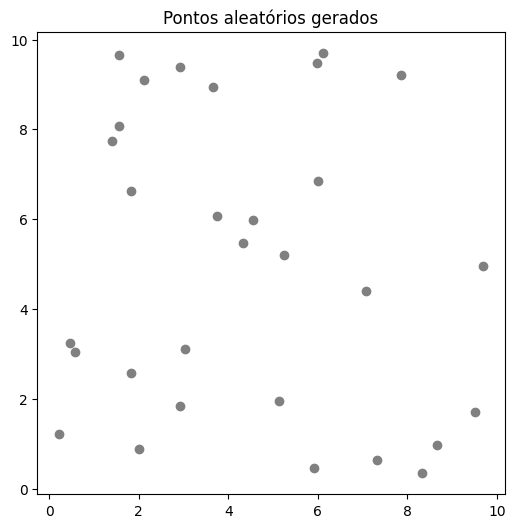

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='grey')
ax.set_title('Pontos aleatórios gerados')
plt.show()

* Dando sequência ao exemplo, definimos a vizinhança utilizando os 5 vizinhos mais próximos:

In [58]:
from sklearn.neighbors import NearestNeighbors

k = 5
coords = np.array(list(zip(x_coords, y_coords)))
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

* Para efeitos de demonstração, selecionamos dois pontos aleatórios dentre os 30 gerados

In [60]:
selected_indices = random.sample(range(num_points), 2)
colors = ['blue', 'green']


* Por fim, para os dois pontos selecionados, visualizamos as respectivas vizinhanças:

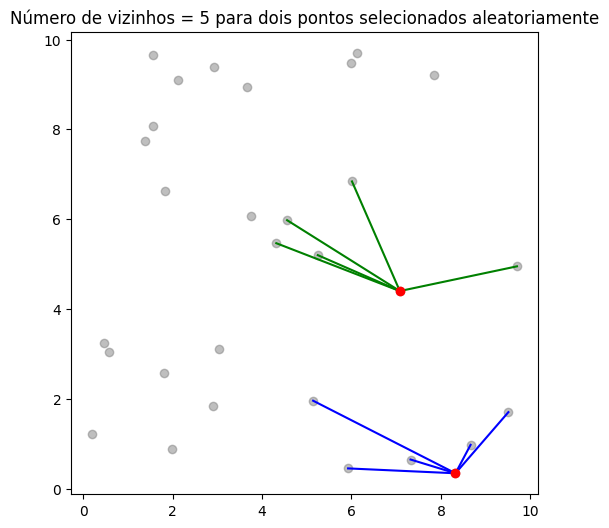

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, color='grey', alpha=0.5)
for color, i in zip(colors, selected_indices):
    point = points[i]
    for neighbor_index in indices[i][1:]:
        neighbor_point = points[neighbor_index]
        ax.plot([point.x, neighbor_point.x], [point.y, neighbor_point.y], color=color)
    ax.plot(point.x, point.y, 'ro')
ax.set_title(f'Número de vizinhos = {k} para dois pontos selecionados aleatoriamente')
plt.show()